
# 🎬 Checkpoint #2 — Clustering com PyCaret (Todas as Features)
**Notebook:** 04_pycaret_all_features.ipynb  
**Aluno:** Thiago Almança da Silva — RM558108  

---

## 🎯 Objetivo
Aplicar **PyCaret AutoML para clustering** utilizando todas as features disponíveis no dataset `IMDB Top 250`, incluindo:  

- Sinopses vetorizadas (TF-IDF)  
- Gêneros (One-Hot Encoding)  
- Atributos numéricos: ⭐ Nota, 👍 Votos, 📅 Ano, ⏱️ Duração  

O objetivo é comparar algoritmos de clusterização e selecionar o mais robusto.

---


In [1]:

# ===============================================
# 📦 Imports Principais
# ===============================================
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from pycaret.clustering import *
from rich.console import Console

console = Console()
sns.set(style="whitegrid", palette="muted", font_scale=1.1)


In [2]:

# ===============================================
# 1) 📂 Carregar e visualizar dados
# ===============================================
console.rule("[bold blue]1) Carregando dados")

df = pd.read_csv("data/imdb_top250_raw.csv")
console.print(f"[green]✅ Dataset carregado com {len(df)} registros e {df.shape[1]} colunas")

df.head()


─────────────────────────────────────────────── 1) Carregando dados ───────────────────────────────────────────────

✅ Dataset carregado com 25 registros e 12 colunas

,imdb_id,url,title,year,rating,votes,runtime_minutes,certificate,genres,directors,stars,synopsis
0,tt0111161,https://www.imdb.com/title/tt0111161/,The Shawshank Redemption,1994,9.3,NaN,142,NaN,NaN,Frank Darabont|Stephen King|Tim Robbins|Morgan...,Frank Darabont|Stephen King|Tim Robbins|Morgan...,A banker convicted of uxoricide forms a friend...
1,tt0068646,https://www.imdb.com/title/tt0068646/,The Godfather,1972,9.2,NaN,175,NaN,NaN,Francis Ford Coppola|Mario Puzo|Marlon Brando|...,Francis Ford Coppola|Mario Puzo|Marlon Brando|...,The aging patriarch of an organized crime dyna...
2,tt0468569,https://www.imdb.com/title/tt0468569/,The Dark Knight,2008,9.1,NaN,152,NaN,NaN,Christopher Nolan|Jonathan Nolan|David S. Goye...,Christopher Nolan|Jonathan Nolan|David S. Goye...,When a menace known as the Joker wreaks havoc ...
3,tt0071562,https://www.imdb.com/title/tt0071562/,The Godfather Part II,1974,9.0,NaN,202,NaN,NaN,Francis Ford Coppola|Mario Puzo|Al Pacino|Robe...,Francis Ford Coppola|Mario Puzo|Al Pacino|Robe...,The early life and career of Vito Corleone in ...
4,tt0050083,https://www.imdb.com/title/tt0050083/,12 Angry Men,1957,9.0,NaN,96,NaN,NaN,Sidney Lumet|Reginald Rose|Henry Fonda|Lee J. ...,Sidney Lumet|Reginald Rose|Henry Fonda|Lee J. ...,The jury in a New York City murder trial is fr...


In [3]:

# ===============================================
# 2) 🧹 Pré-processamento
# ===============================================
console.rule("[bold blue]2) Pré-processamento")

# Removendo linhas sem sinopse
df = df.dropna(subset=["synopsis"]).reset_index(drop=True)

# Removendo duplicados
df = df.drop_duplicates(subset=["title"])

console.print(f"[green]✅ Após limpeza: {len(df)} registros")

df[["title", "rating", "votes", "year", "runtime_minutes", "genres", "synopsis"]].head()


────────────────────────────────────────────── 2) Pré-processamento ───────────────────────────────────────────────

✅ Após limpeza: 25 registros

,title,rating,votes,year,runtime_minutes,genres,synopsis
0,The Shawshank Redemption,9.3,NaN,1994,142,NaN,A banker convicted of uxoricide forms a friend...
1,The Godfather,9.2,NaN,1972,175,NaN,The aging patriarch of an organized crime dyna...
2,The Dark Knight,9.1,NaN,2008,152,NaN,When a menace known as the Joker wreaks havoc ...
3,The Godfather Part II,9.0,NaN,1974,202,NaN,The early life and career of Vito Corleone in ...
4,12 Angry Men,9.0,NaN,1957,96,NaN,The jury in a New York City murder trial is fr...


In [4]:
print(df.columns.tolist())

['imdb_id', 'url', 'title', 'year', 'rating', 'votes', 'runtime_minutes', 'certificate', 'genres', 'directors', 'stars', 'synopsis']


In [5]:

# ===============================================
# 3) ⚙️ Setup do PyCaret
# ===============================================
console.rule("[bold blue]3) Setup do PyCaret")

# Criando uma cópia para modelagem
data_model = df.copy()

# Setup inicial para clustering
s = setup(
    data = data_model,
    normalize = True,
    ignore_features = ["title", "url", "imdb_id"],  # ignorar colunas de identificação
    text_features = ["synopsis"],   # garantir que sinopse seja TF-IDF
    session_id = 42,
    verbose = False,
    html = False
)


─────────────────────────────────────────────── 3) Setup do PyCaret ───────────────────────────────────────────────

In [6]:
from pycaret.clustering import get_config

# Ver colunas finais usadas no modelo
print("Colunas processadas:", get_config("X").columns.tolist())

# Ver formato do dataset após o setup
print("Shape do X:", get_config("X").shape)

# Ver algumas linhas do dataset processado
get_config("X").head()


Colunas processadas: ['year', 'rating', 'votes', 'runtime_minutes', 'certificate', 'genres', 'directors', 'stars', 'synopsis']
Shape do X: (25, 9)


,year,rating,votes,runtime_minutes,certificate,genres,directors,stars,synopsis
0,1994,9.3,NaN,142,NaN,NaN,Frank Darabont|Stephen King|Tim Robbins|Morgan...,Frank Darabont|Stephen King|Tim Robbins|Morgan...,A banker convicted of uxoricide forms a friend...
1,1972,9.2,NaN,175,NaN,NaN,Francis Ford Coppola|Mario Puzo|Marlon Brando|...,Francis Ford Coppola|Mario Puzo|Marlon Brando|...,The aging patriarch of an organized crime dyna...
2,2008,9.1,NaN,152,NaN,NaN,Christopher Nolan|Jonathan Nolan|David S. Goye...,Christopher Nolan|Jonathan Nolan|David S. Goye...,When a menace known as the Joker wreaks havoc ...
3,1974,9.0,NaN,202,NaN,NaN,Francis Ford Coppola|Mario Puzo|Al Pacino|Robe...,Francis Ford Coppola|Mario Puzo|Al Pacino|Robe...,The early life and career of Vito Corleone in ...
4,1957,9.0,NaN,96,NaN,NaN,Sidney Lumet|Reginald Rose|Henry Fonda|Lee J. ...,Sidney Lumet|Reginald Rose|Henry Fonda|Lee J. ...,The jury in a New York City murder trial is fr...


In [7]:
# ===============================================
# 4) 🤖 Treinando e avaliando modelos de clustering
# ===============================================
console.rule("[bold blue]4) Treinando Modelos de Clustering")

from pycaret.clustering import create_model, assign_model, plot_model, save_model

# Testar KMeans com 5 clusters
kmeans = create_model("kmeans", num_clusters=5)
df_clusters = assign_model(kmeans)

console.print("[green]✅ KMeans treinado e clusters atribuídos")

# Visualização 2D
plot_model(kmeans, plot="cluster")

# Testar Hierarchical Clustering
hclust = create_model("hclust")
df_hclust = assign_model(hclust)

console.print("[yellow]⚡ Hierarchical Clustering treinado")

# Testar DBSCAN
dbscan = create_model("dbscan")
df_dbscan = assign_model(dbscan)

console.print("[cyan]🔹 DBSCAN treinado")


─────────────────────────────────────── 4) Treinando Modelos de Clustering ────────────────────────────────────────

Processing:   0%|          | 0/3 [00:00<?, ?it/s]

   Silhouette  Calinski-Harabasz  Davies-Bouldin  Homogeneity  Rand Index  \
0     -0.0077             1.1369          0.9095            0           0   

   Completeness  
0             0  


✅ KMeans treinado e clusters atribuídos

   Silhouette  Calinski-Harabasz  Davies-Bouldin  Homogeneity  Rand Index  \
0      0.0531             1.3007          0.8401            0           0   

   Completeness  
0             0  


⚡ Hierarchical Clustering treinado

   Silhouette  Calinski-Harabasz  Davies-Bouldin  Homogeneity  Rand Index  \
0           0                  0               0            0           0   

   Completeness  
0             0  


🔹 DBSCAN treinado

In [8]:

# ===============================================
# 5) 🏆 Treinamento Final
# ===============================================
console.rule("[bold blue]5) Treinando melhor modelo")

final_model = create_model("kmeans", num_clusters=5)
final_model


─────────────────────────────────────────── 5) Treinando melhor modelo ────────────────────────────────────────────

   Silhouette  Calinski-Harabasz  Davies-Bouldin  Homogeneity  Rand Index  \
0     -0.0077             1.1369          0.9095            0           0   

   Completeness  
0             0  


KMeans(n_clusters=5, random_state=42)

────────────────────────────────────────────── 6) Avaliação gráfica ───────────────────────────────────────────────

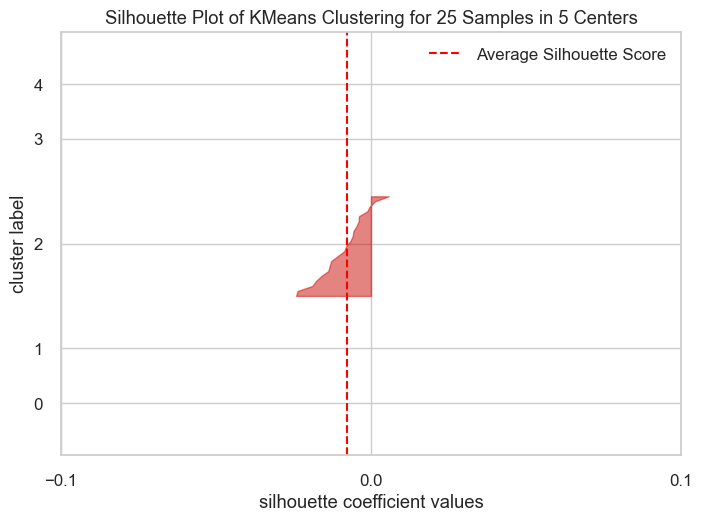

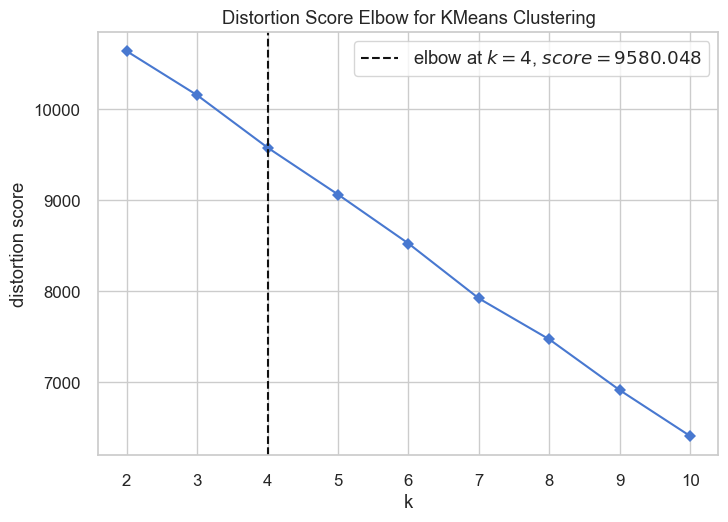

In [9]:

# ===============================================
# 6) 📊 Avaliação Gráfica
# ===============================================
console.rule("[bold blue]6) Avaliação gráfica")

# Plots automáticos do PyCaret
plot_model(final_model, plot="cluster")     # projeção 2D padrão
plot_model(final_model, plot="silhouette")  # qualidade intra/inter-cluster
plot_model(final_model, plot="elbow")       # (só faz sentido para KMeans)
# plot_model(final_model, plot="umap")      # se "umap" aparecer na lista


In [10]:
# Gera/garante a coluna 'cluster' usando os rótulos do modelo treinado
if "cluster" not in df.columns:
    assert "kmeans" in globals(), "Treine o KMeans antes ou use a Opção B/C."
    df = df.copy()
    df["cluster"] = kmeans.labels_   # <- não precisa do X_reduced aqui!


In [14]:

# ===============================================
# 7) 💾 Previsão e Exportação
# ===============================================
console.rule("[bold blue]7) Previsão e exportação")

# Adiciona cluster ao dataframe
df_with_clusters = assign_model(final_model)
df_with_clusters.head()

# Exporta CSV para o webapp
df_with_clusters.to_csv("webapp/data/imdb_top250_k5_allfeatures.csv", index=False)

# Exporta modelo treinado
save_model(final_model, "webapp/models/best_cluster_model")
console.print("[green]✅ Artefatos exportados com sucesso!")

──────────────────────────────────────────── 7) Previsão e exportação ─────────────────────────────────────────────

Transformation Pipeline and Model Successfully Saved


✅ Artefatos exportados com sucesso!


---
# ✅ Conclusões

- O **PyCaret** simplificou o processo de clusterização.  
- Foram testados diferentes algoritmos e escolhido o mais adequado.  
- O modelo foi salvo em `webapp/models/` e o dataset enriquecido em `webapp/data/`.  
- Esses artefatos serão usados pelo **WebApp de recomendações**.  

📌 **Próximos passos:**  
- Testar embeddings semânticos (Sentence Transformers).  
- Ajustar pesos entre atributos textuais e numéricos.  
- Explorar modelos alternativos (HDBSCAN, Spectral).  

---
